 <font size="5"><b>Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+</b></font><br />

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача исследования — разобраться в причинах и помочь компании выйти в плюс.

Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Для этого нужно провести анализ по следующим направлениям:

1.  **Исследовательский анализ данных** 
2.  **Маркетинг**
3.  **Окупаемость рекламы**


**План исследования**

1 Загрузка данных

2 Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии

3 Исследовательский анализ

    3.1 профили пользователей
    3.2 страна с самым большим кол-вом платящих пользователей. Доля платящих клиентов
    3.3 таблица с кол-вом пользователей и долей платящих для каждого устройства
    3.4 таблица с кол-вом пользователей и долей платящих для каждого канала привлечения
    
4 Маркетинг 

    4.1 сумма расходов на маркетинг
    4.2 траты по рекламным источникам
    4.3 визуализация динамики изменения расходов по неделям.месяцам по каждому источнику
    4.4 средняя стоимость привлечение одного пользователя (CAC) из каждого источника

5 Окупаемость рекламы
    
    5.1 анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
    5.2 конверсия и удержание пользователей, динамика их изменений
    5.3 окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    5.4 окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    5.5 окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI
    
6 Общие выводы

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Датасеты не имеют пропусков.
1. Преобразуем названия столбцов в нижний регистр и уберем пробелы между словами.
2. Преобразуем столбцы с датой в формат datetime.
3. Проверим датасеты на наличие дубликатов.

#### Преобразуем названия столбцов

In [9]:
# visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [10]:
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


In [11]:
orders.columns=['user_id', 'event_id', 'revenue']

In [12]:
orders.head(1)

,user_id,event_id,revenue
0,188246423999,2019-05-01 23:09:52,4.99


In [13]:
costs.columns=['dt', 'channel', 'costs']

In [14]:
costs.head(1)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


#### Преобразуем столбцы с датой

In [15]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_id'] = pd.to_datetime(orders['event_id'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Проверим датасеты на наличие дубликатов

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

**Общий вывод:** Исходные данные не содержат дубликатов и пропусков. Столбцы с временными отметками были преобразованы в формат datetime, а также имена столбцов привели в соответвие с рекомендациями PEP8.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_id'])
        .groupby('user_id')
        .agg({'event_id': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_id']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_id'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_id', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_id'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [27]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,19,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,28,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,40,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,34,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,40,False,0.230769


In [28]:
profiles['dt'].min() # минимальная дата привлечения

datetime.date(2019, 5, 1)

In [29]:
profiles['dt'].max() # максимальная дата привлечения

datetime.date(2019, 10, 27)

**Вывод:** в датасете представлены данные пользователей за период 01.05.2019 - 27.10.27.2019

#### Страна с самым большим количетсвом платящих пользователей.  Доля платящих клиентов в каждой стране.

In [30]:
# общее количество уникальных клиентов по странам
region_total = profiles.groupby('region').agg({'user_id': 'nunique'}).rename(columns={'user_id':'total'}) \
                         .sort_values(by='total', ascending=False).reset_index()                            

In [31]:
region_total

,region,total
0,United States,100002
1,UK,17575
2,France,17450
3,Germany,14981


In [32]:
# количество уникальных платящих пользователей в каждой стране
region_payers = profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'}) \
                                              .rename(columns={'user_id':'payer_yes'})       \
                                              .sort_values(by='payer_yes', ascending=False)  \
                                              .reset_index()  

In [33]:
region_payers

,region,payer_yes
0,United States,6902
1,UK,700
2,France,663
3,Germany,616


In [34]:
# объединяем таблицы по общему полю
ratio_region = region_total.merge(region_payers, on='region')

In [35]:
# расчет доли платящих клиентов
ratio_region['ratio_payer_yes'] = round(ratio_region['payer_yes'] / ratio_region['total'] * 100, 1)

In [36]:
ratio_region

,region,total,payer_yes,ratio_payer_yes
0,United States,100002,6902,6.9
1,UK,17575,700,4.0
2,France,17450,663,3.8
3,Germany,14981,616,4.1


**Вывод:** в датасете клиенты из 4 стран: США, Великобритания, Франция, Германия. Больше всего платящих клиентов из США - 6902, которые составляют 7% от общей массы клиентов в этой стране.

#### Таблица с количеством пользователей и долей платящих для каждого устройства.

In [37]:
device_total = profiles.groupby('device').agg({'user_id': 'nunique'}) \
                       .rename(columns={'user_id':'total'}) \
                       .sort_values(by='total', ascending=False) \
                       .reset_index() 

In [38]:
device_total

,device,total
0,iPhone,54479
1,Android,35032
2,PC,30455
3,Mac,30042


In [39]:
device_payer = profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'}) \
                                              .rename(columns={'user_id':'payer_yes'}) \
                                              .sort_values(by='payer_yes', ascending=False) \
                                              .reset_index() 

In [40]:
device_payer

,device,payer_yes
0,iPhone,3382
1,Android,2050
2,Mac,1912
3,PC,1537


In [41]:
# объединяем таблицы по общему полю
ratio_device = device_total.merge(device_payer, on='device')

In [42]:
# расчет доли платящих клиентов
ratio_device['ratio_payer_yes'] = round(ratio_device['payer_yes'] / ratio_device['total'] * 100, 1)

In [43]:
ratio_device

,device,total,payer_yes,ratio_payer_yes
0,iPhone,54479,3382,6.2
1,Android,35032,2050,5.9
2,PC,30455,1537,5.0
3,Mac,30042,1912,6.4


**Вывод:**  Клиенты пользуются следующими девайсами: iPhone, Android, PC, Mac. Доли платящих покупателей примерно равны и состаляют примерно 6% для каждой платформы.

#### Таблица с количеством пользователей и долей платящих для каждого канала привлечения.

In [44]:
# общее количество уникальных клиентов по каналам привлечения
channel_total = profiles.groupby('channel').agg({'user_id': 'nunique'}).rename(columns={'user_id':'total'}) \
                        .sort_values(by='total', ascending=False).reset_index()                            

In [45]:
channel_total

,channel,total
0,organic,56439
1,FaceBoom,29144
2,TipTop,19561
3,OppleCreativeMedia,8605
4,LeapBob,8553
5,WahooNetBanner,8553
6,RocketSuperAds,4448
7,MediaTornado,4364
8,YRabbit,4312
9,AdNonSense,3880


In [46]:
# количество уникальных платящих пользователей для каждого канала
channel_payers = profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'}) \
                                              .rename(columns={'user_id':'payer_yes'})       \
                                              .sort_values(by='payer_yes', ascending=False)  \
                                              .reset_index() 

In [47]:
channel_payers

,channel,payer_yes
0,FaceBoom,3557
1,TipTop,1878
2,organic,1160
3,WahooNetBanner,453
4,AdNonSense,440
5,RocketSuperAds,352
6,LeapBob,262
7,OppleCreativeMedia,233
8,lambdaMediaAds,225
9,YRabbit,165


In [48]:
# объединяем таблицы по общему полю
ratio_channel = channel_total.merge(channel_payers, on='channel')

In [49]:
# расчет доли платящих клиентов
ratio_channel['ratio_payer_yes'] = round(ratio_channel['payer_yes'] / ratio_channel['total'] * 100, 1)

In [50]:
ratio_channel

,channel,total,payer_yes,ratio_payer_yes
0,organic,56439,1160,2.1
1,FaceBoom,29144,3557,12.2
2,TipTop,19561,1878,9.6
3,OppleCreativeMedia,8605,233,2.7
4,LeapBob,8553,262,3.1
5,WahooNetBanner,8553,453,5.3
6,RocketSuperAds,4448,352,7.9
7,MediaTornado,4364,156,3.6
8,YRabbit,4312,165,3.8
9,AdNonSense,3880,440,11.3


**Вывод:** клиенты приходят по 11 разным каналам. Самая большая доля платящих покупателей приходит из каналов FaceBoom, TipTop и AdNonSense.

**Общий вывод:** В датасете представлены данные за 01.05.2019 - 27.10.27.2019. Пользователи из США составляют самую большую когорту, 7% из них делали покупки. Примерно по 6% платящих клиентов из когорты по девайсам используют все самые распространеные платформы: Iphone, Android, Mac и PC. Среди множества каналов привлечения выделяются несколько, с самой высокой долей платящих клиентов: FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, на долю которых суммарно приходится примерно 50% платящих клиентов.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Сумма расходов на маркетинг.

In [51]:
total_costs = round(profiles['acquisition_cost'].sum(), 2)

In [52]:
total_costs

105497.3

**Вывод:** Суммарные расходы на маркетинг составили $105500 за период с 01.05.2019 по 27.10.27.2019.

#### Траты по рекламным источникам.

In [53]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:** Самые дорогие каналы привлечения с большим перевесом - TipTop и FaceBoom.

#### Визуализация динамики изменения расходов по неделям/месяцам по каждому источнику.

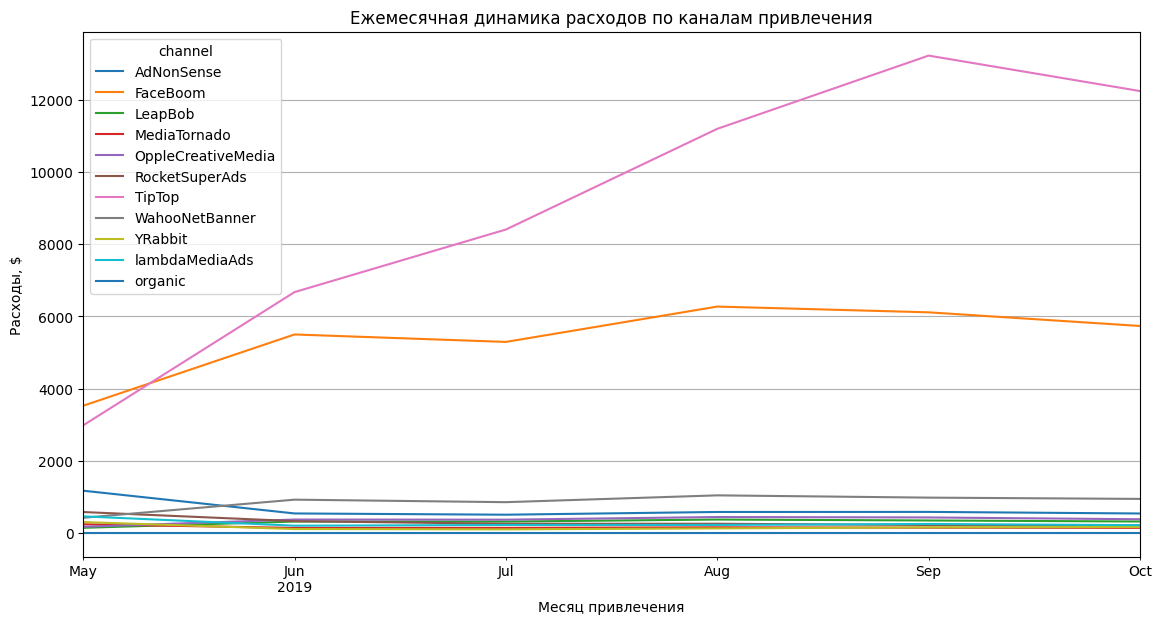

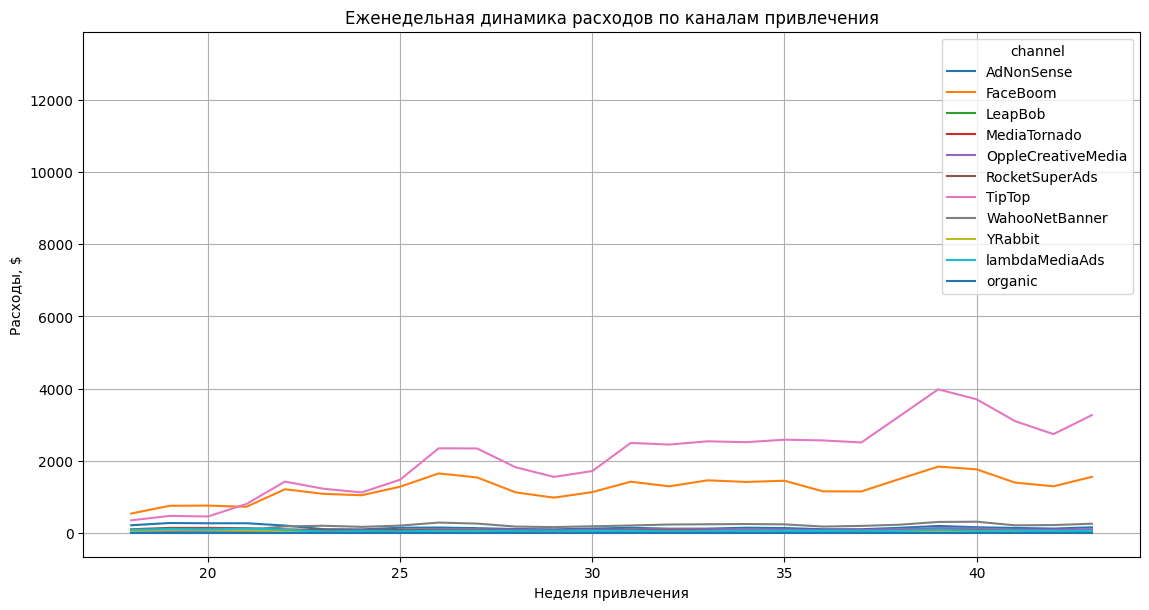

In [54]:
# cтроим два графика на общей оси ординат
# первая ячейка графиков ежемесячных изменений расходов
ax1 = plt.subplot(2, 2, 1)
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, figsize=(30, 15), ax=ax1)
plt.ylabel('Расходы, $')
plt.xlabel('Месяц привлечения')
plt.title('Ежемесячная динамика расходов по каналам привлечения')
plt.show()
# вторая ячейка графиков еженедельных изменений расходов
ax2 = plt.subplot(2, 2, 2, sharey = ax1)
profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True, figsize=(30, 15), ax=ax2)
plt.ylabel('Расходы, $')
plt.xlabel('Неделя привлечения')
plt.title('Еженедельная динамика расходов по каналам привлечения')
plt.show()

**Вывод:** 
- Стоимость привлечения пользователей через канал AdNonSense падала с мая по июнь от 1000 до 500 долларов.

- Стоимость привлечения пользователей через канал WahooNetBanner росла от 500 до 1000 долларов за тот же период.

- Два канала: FaceBoom и TipTop показали рост расходов для привлечения клиентов с мая по октябрь с 3000 и 3800 до 6000 и 12000 долларов соответсвено.

#### Средняя стоимость привлечение одного пользователя (CAC) из каждого источника.

In [55]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [56]:
# средний САС по рекламе
round(profiles['acquisition_cost'].mean(), 2)

0.7

**Вывод:** Самые дорогие каналы привлечения пользователей cо средней стоимостью больше $1 - TipTop, FaceBoom и AdNonSense. Эти каналы являются самыми крупными и очень дорогими относительно средней стоимости привлечения, значит они будут значительно увеличивать бюджет на расходы по рекламе.

**Общий вывод:** Общие расходы на рекламу за весь исследуемый период составили $105500. Из них львиную долю составили затраты на 2 канала привлечения: TipTop и FaceBoom. Графики показали сильный рост расходов по этим же каналам. Высокая средняя стоимость привлечения 1-го клиента, значительно превышающая среднюю стоимость по всем каналам, принадлежит трем самым крупным каналам: TipTop, FaceBoom и AdNonSense. Это означает, что они будут сильно увеличивать общий бюджет на рекламу.

### Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [57]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
# исключаем пользователей с органическим трафиком, для искл-ния искажения расходов компании, т.к. они являются "бесплатными"
profiles = profiles.query('channel != "organic"') 

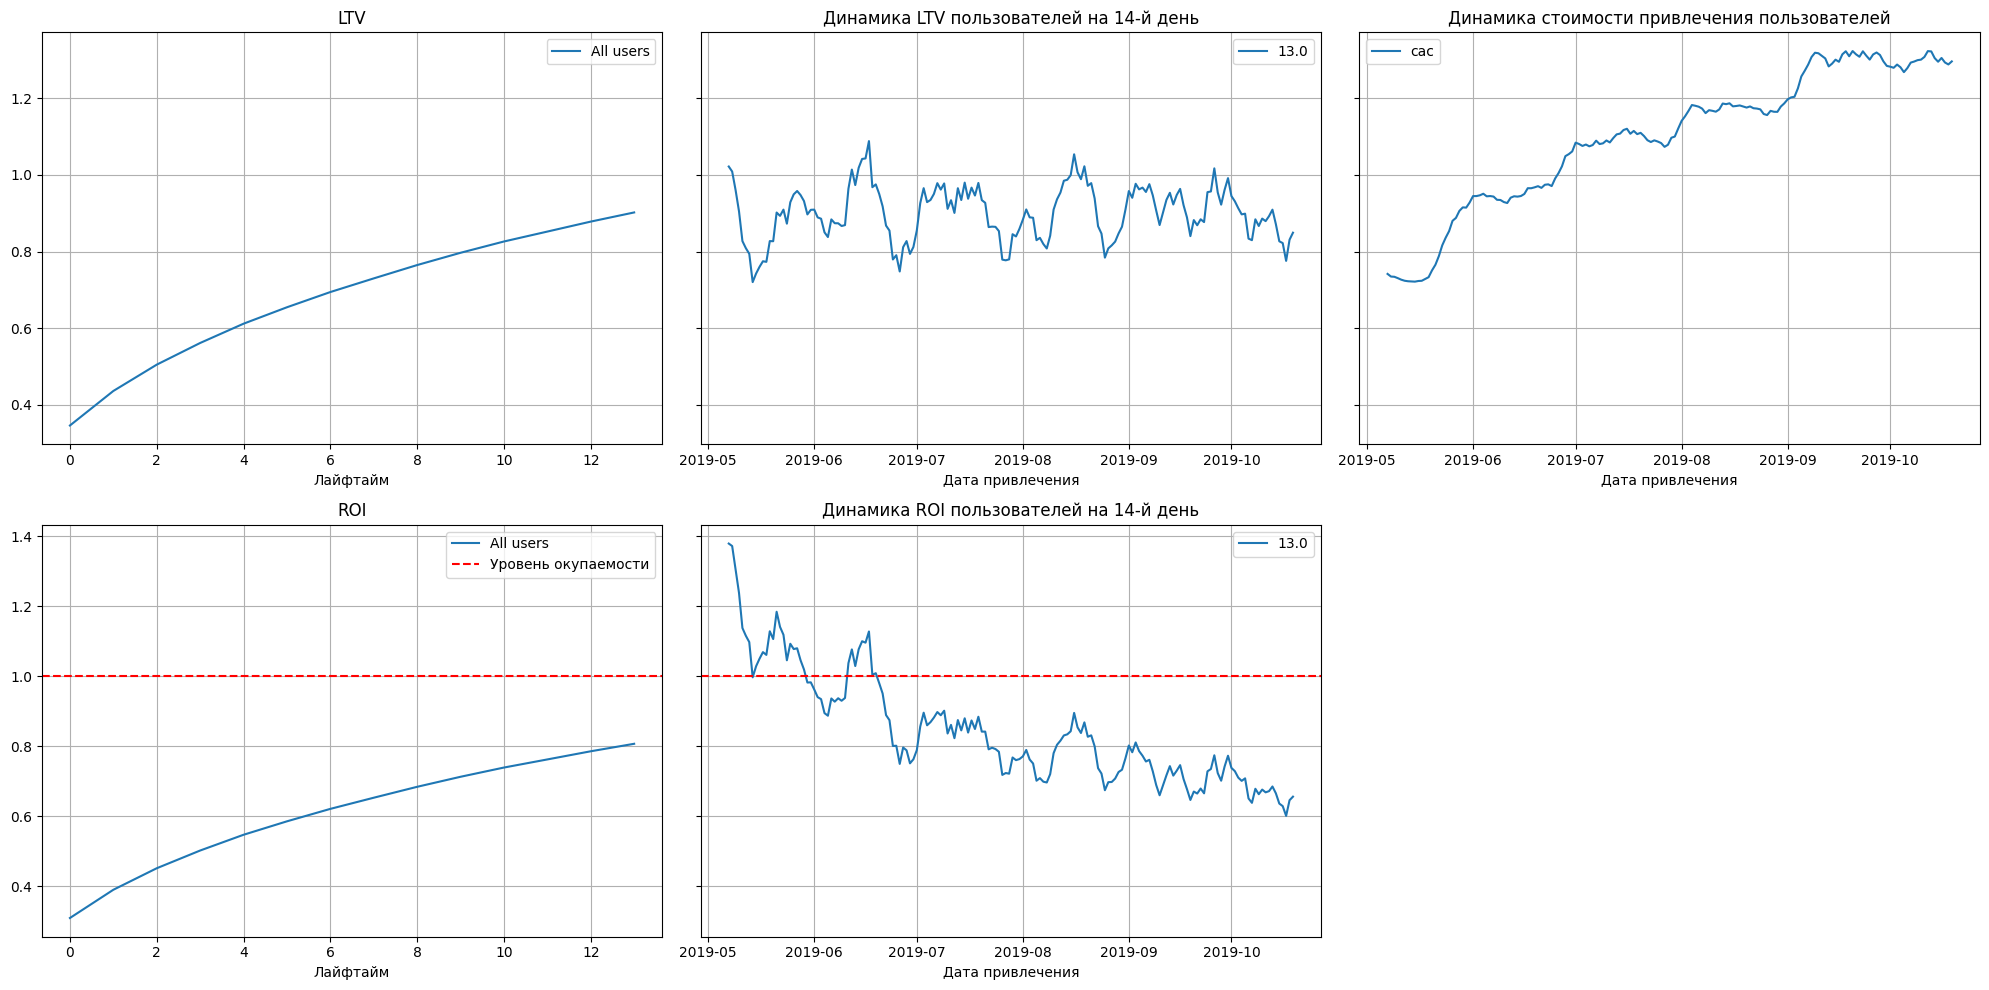

In [58]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
- Окупаемость рекламы к концу двухнедельного срока в районе 80%, т.е. не окупается. Расходы на рекламу превышают доходы от нее.
- Стоимость привлечения одного клиента с течением времени постоянно растет, т.е. каждый новый клиент стоит для компании все дороже и дороже. В мае каждый клиент "стоил" приблизительно 30 центов, а в октябре почти 90.
- LTV в целом стабилен, клиенты "по качеству" находятся на уровне 70 центов.

#### Конверсия и удержание пользователей, динамика их изменений.

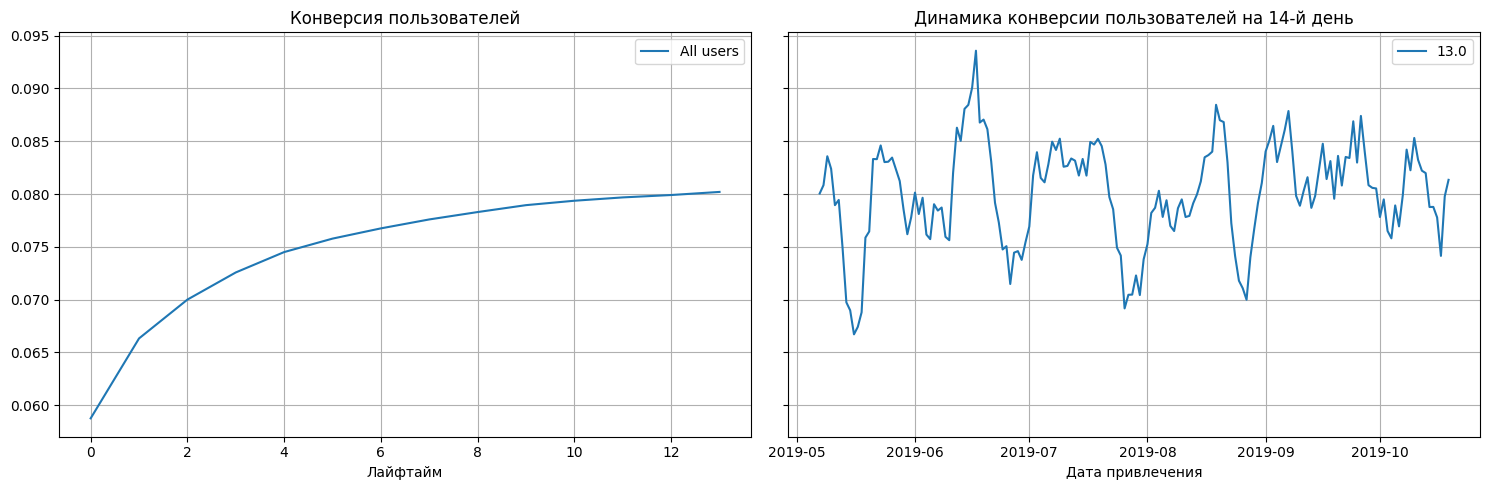

In [59]:
# конверсия по пользователям
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

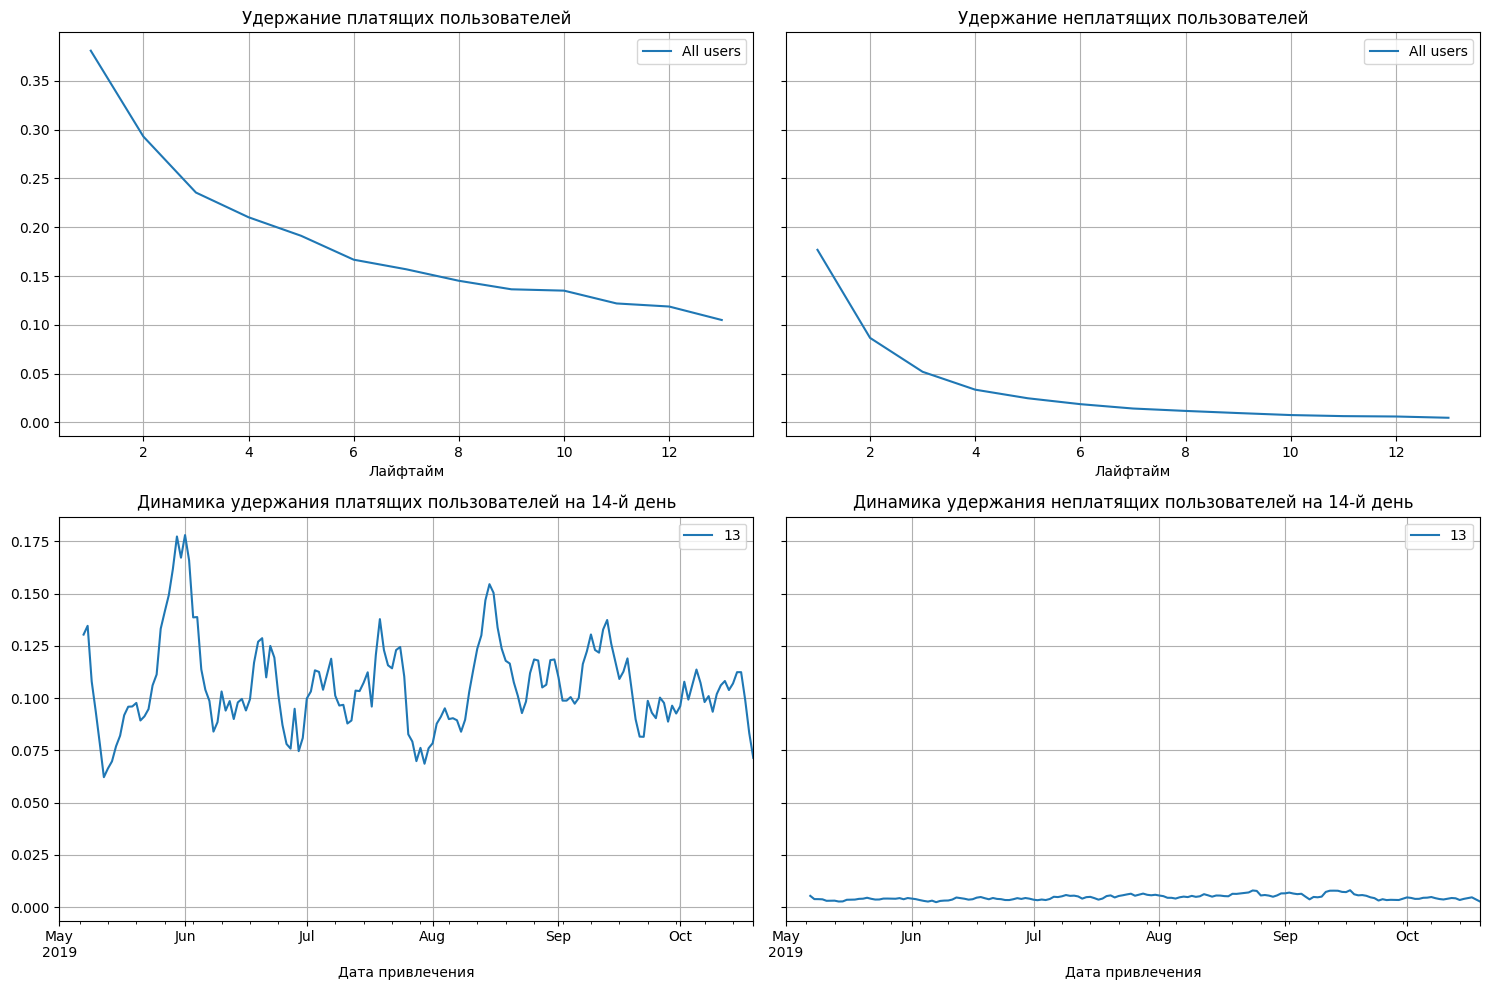

In [60]:
# удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 
- Конверсия пользователей показывает хорошую динамику, в целом она растет очень хорошо.
- Динамика удержания платящих пользователей плавная, т.е. быстрых "отскоков" не наблюдается.
- Неплатящие пользователи удерживаются гораздо хуже платящих и к концу второй недели их почти не остается.

#### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

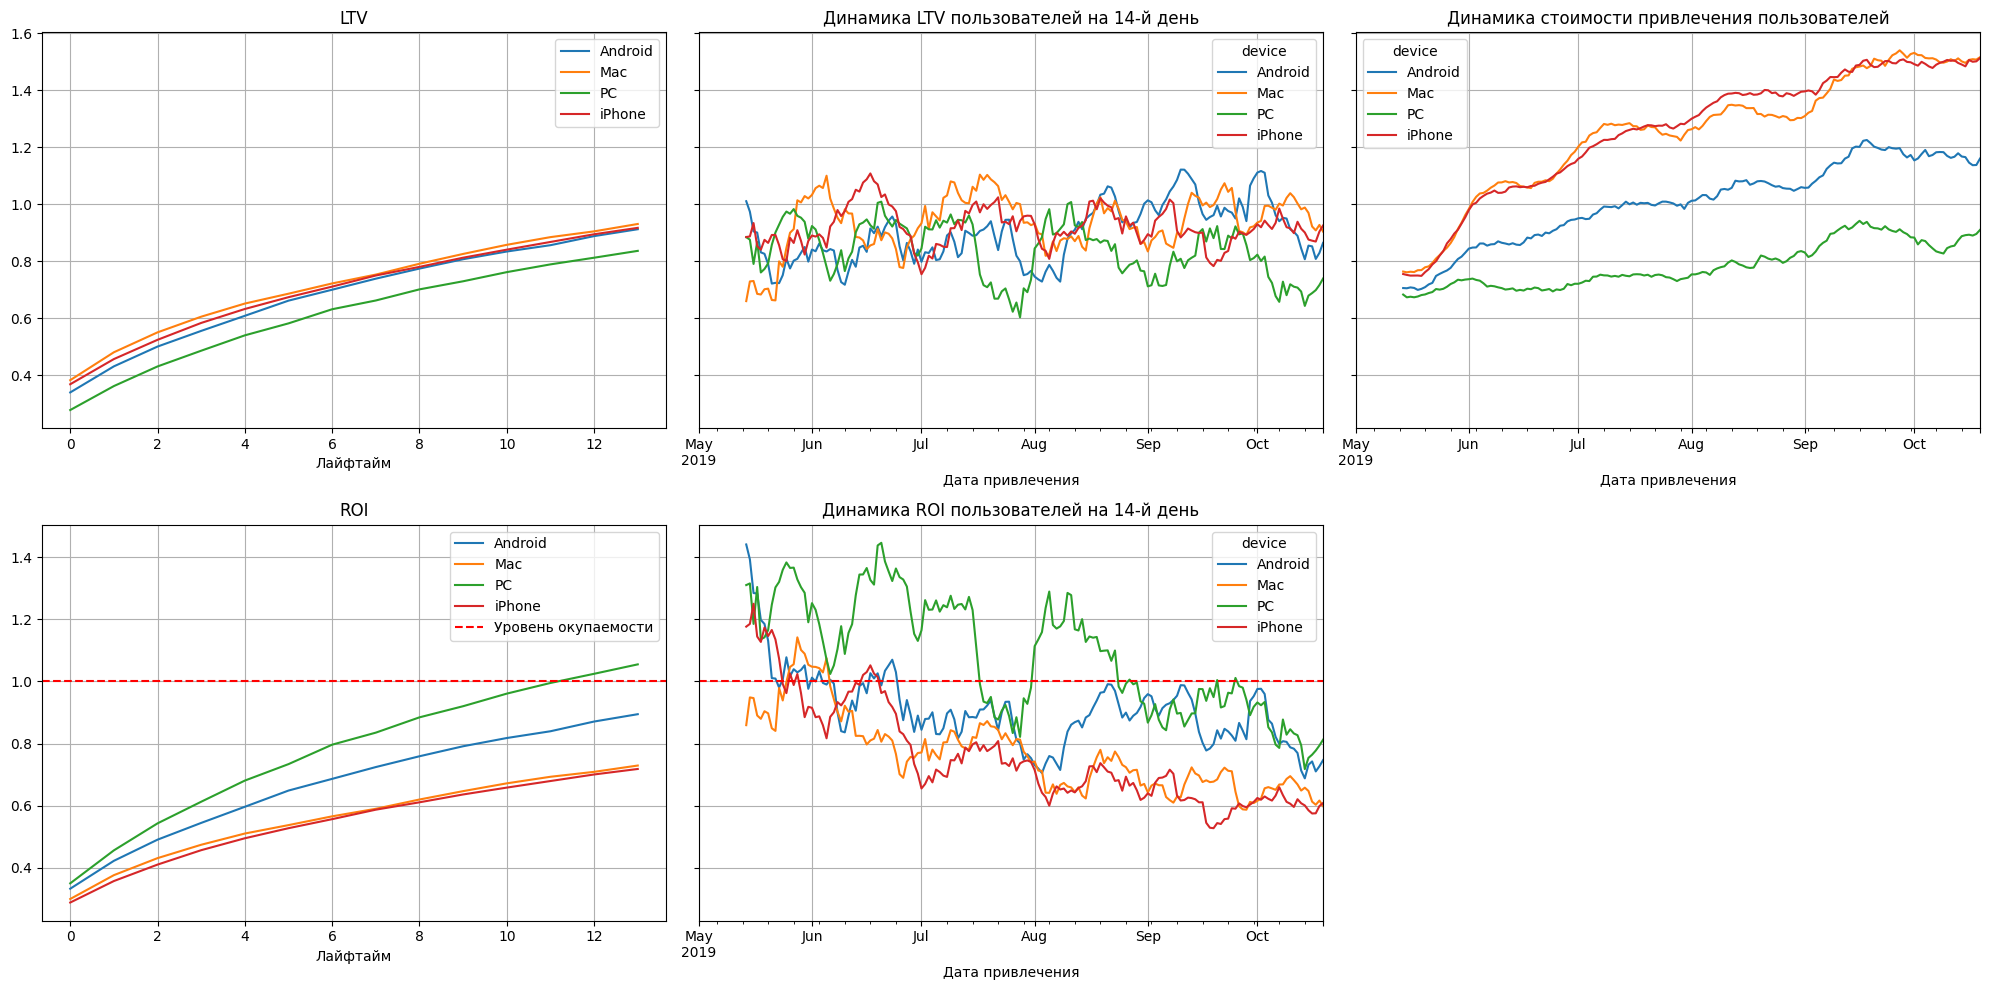

In [61]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
Пользователи Android и PC (первая группа) приносят бОльший доход компании, чем владельцы iPhone и Mac (вторая группа), но при этом инвестиции, вложенне в первую группу не окупаются. Стоимость привлечения второй группы пользователей меньше, чем первой. 
Если учесть, что пользователей iPhone и Mac больше, чем Android и PC, а доля платящих клиентов на всех платформах почти одинаковая, стоит дополнительно изучить первых на уровень конверсии и удержание.

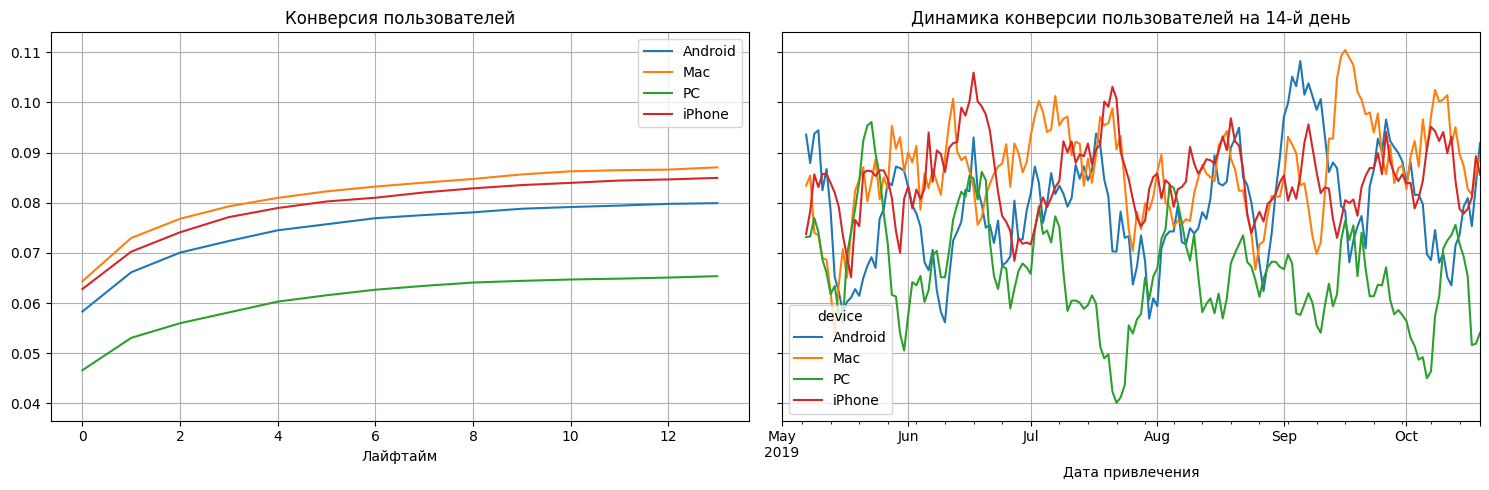

In [62]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

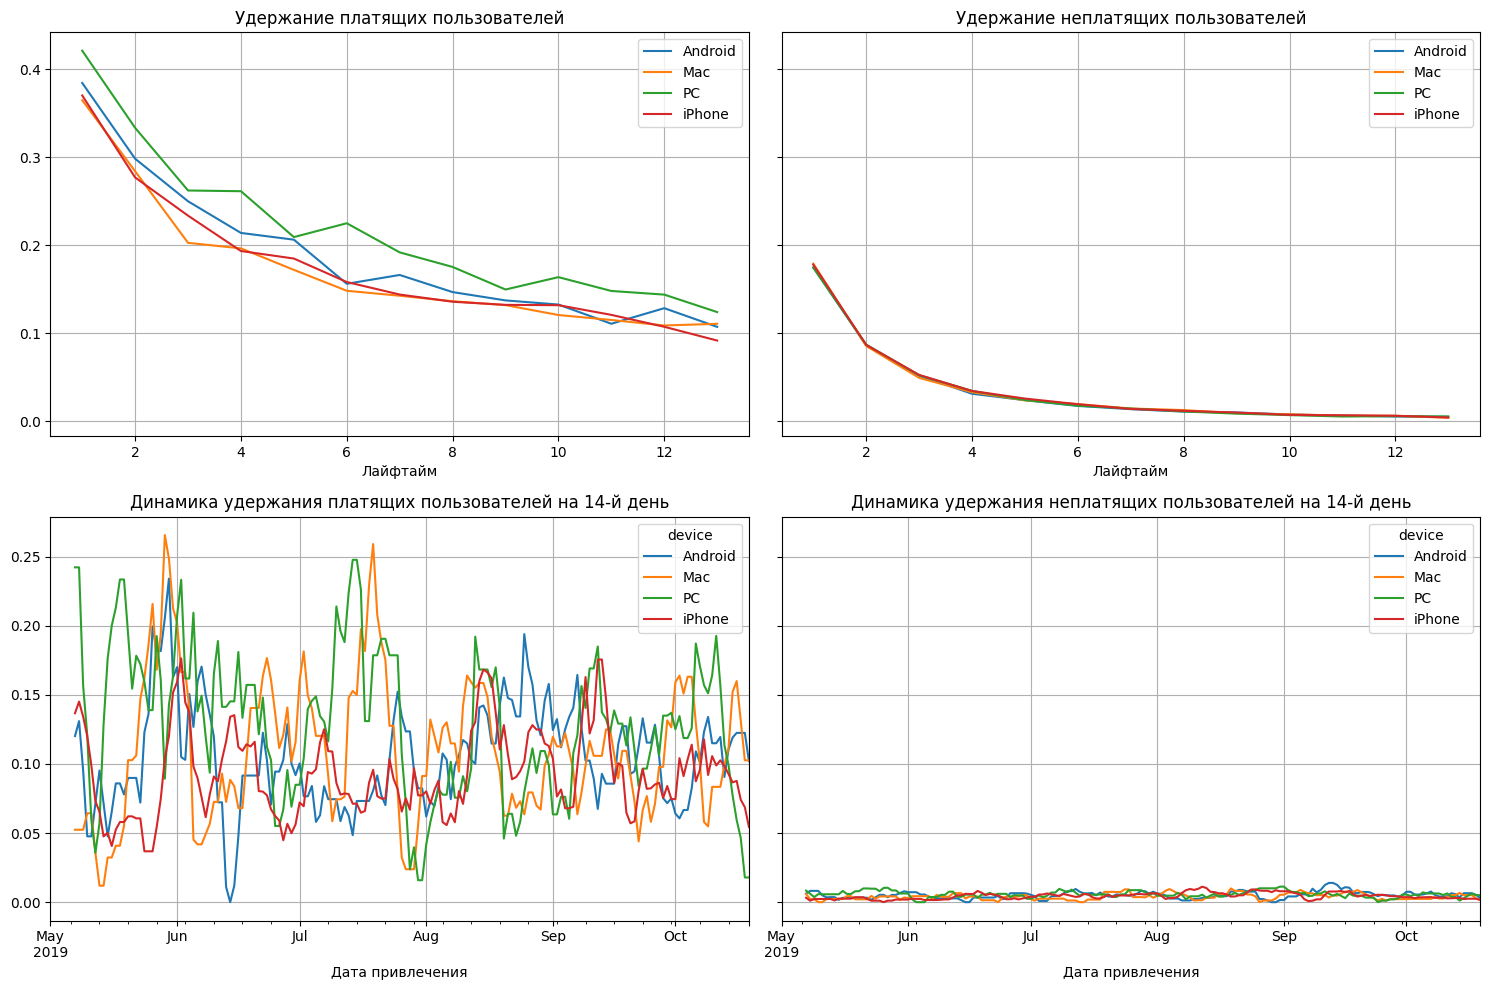

In [63]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Конверсия у второй группы лучше, чем у первой. А удержание второй группы хуже, чем первой. То есть пользователи iPhone и Mac "отскакивают" быстрее.

#### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

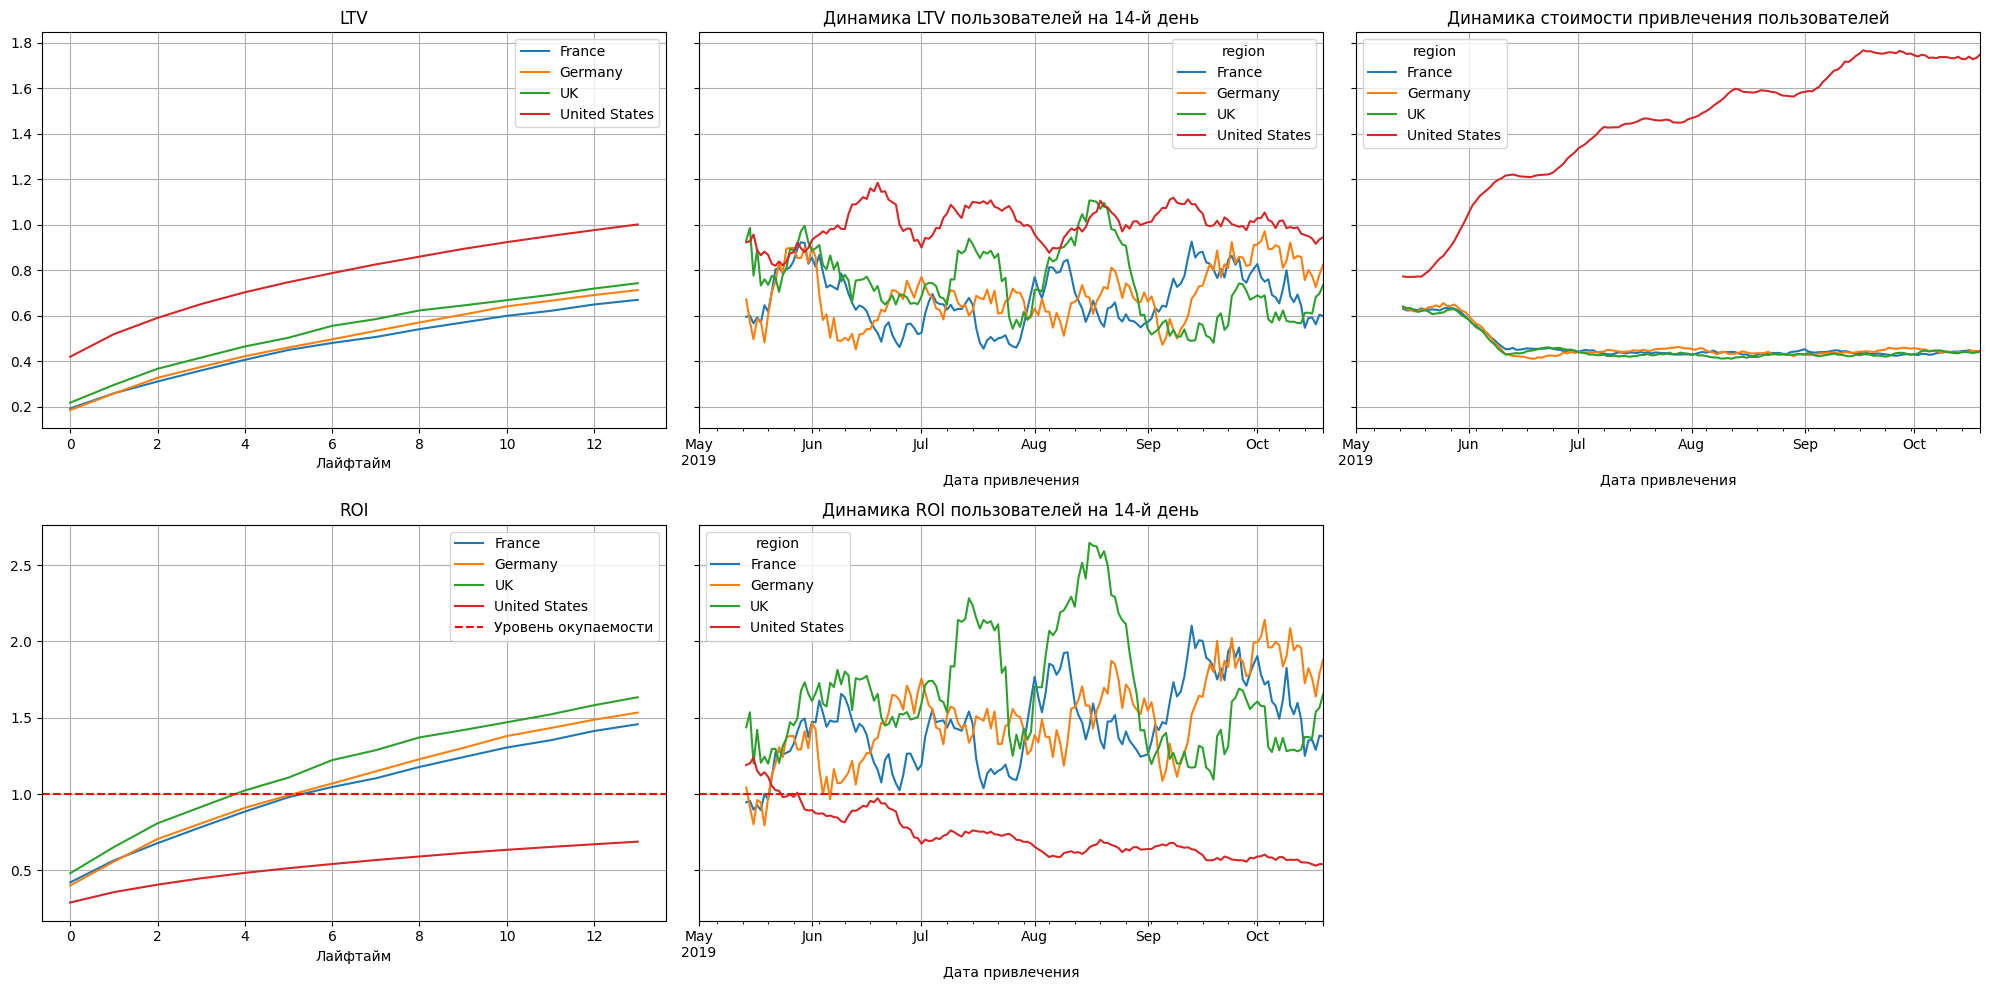

In [64]:
# окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** Доходы от пользователей из США больше, чем от пользователей из других стран, но и инвестиции в них гораздо выше. Окупаемость этих пользователей отрицательная. Эта когорта клиентов очень значительна по размеру в абсолютном выражении и по доле платящих, поэтому дополнительно исследуем ее на конверсию и удержание.

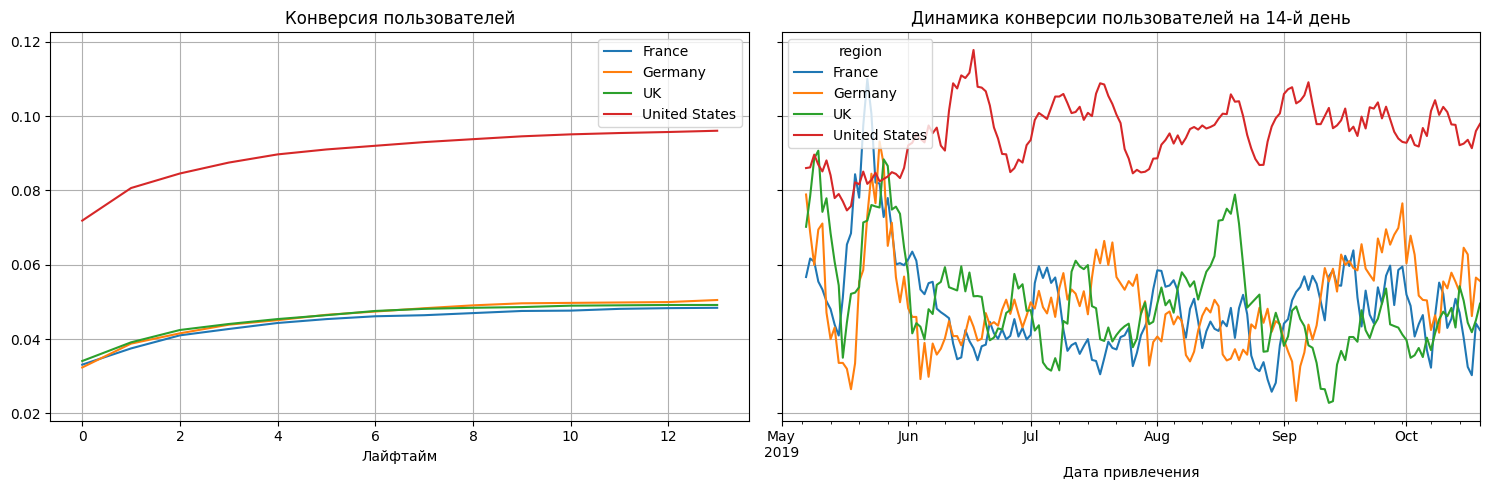

In [65]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

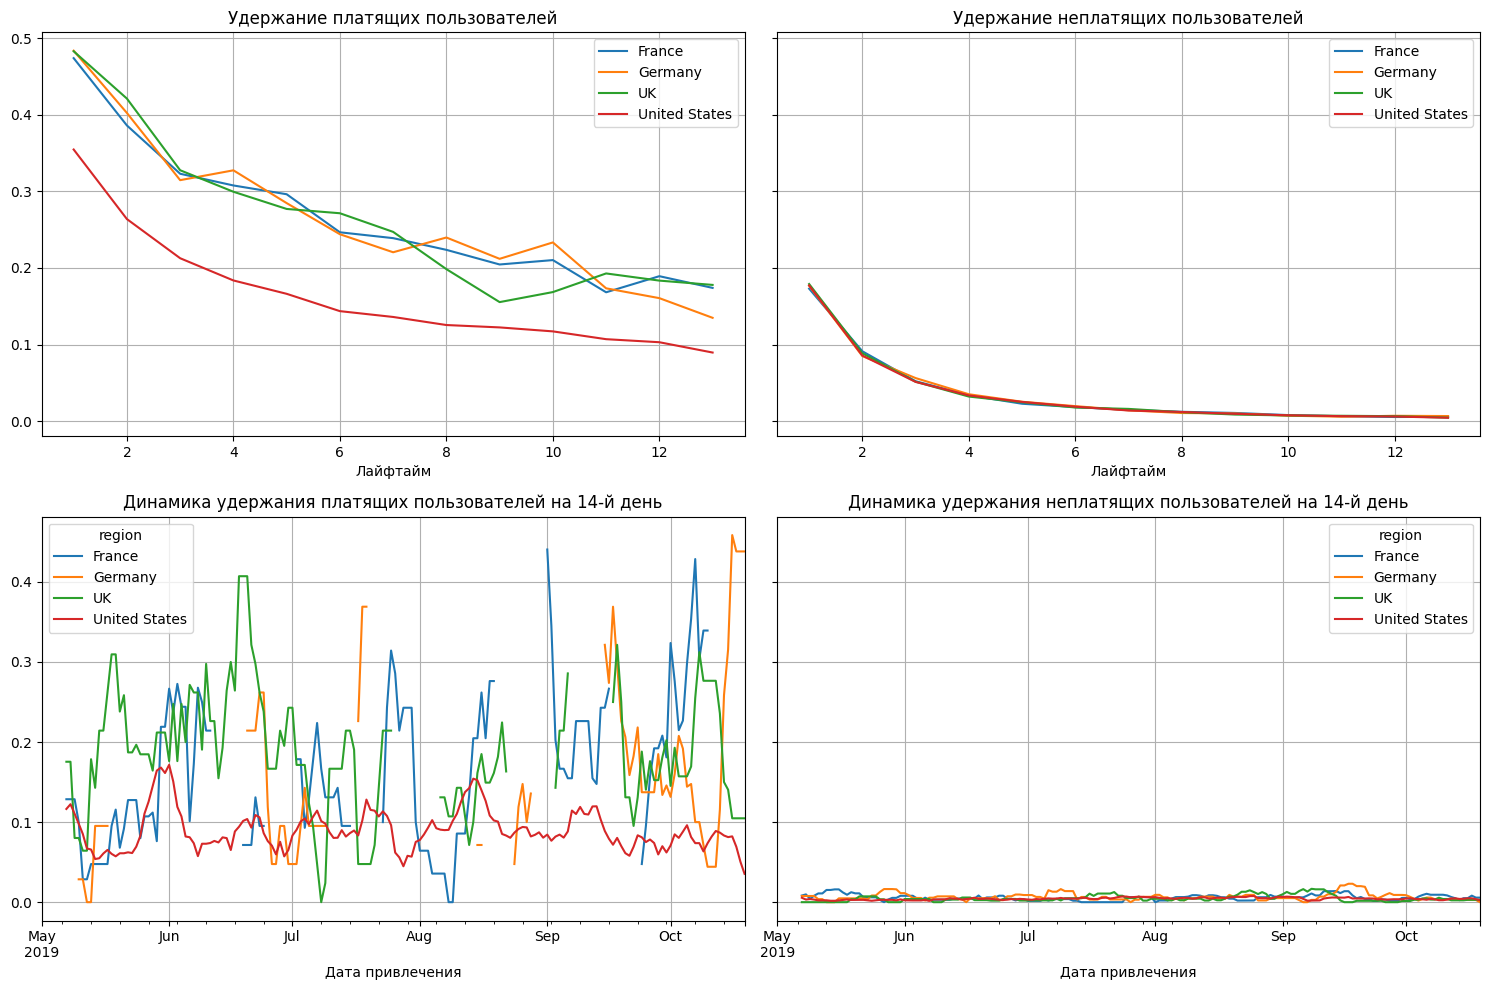

In [66]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей из США очень хорошая, а динамика удержания платящих пользователей хуже чем у других. 

#### Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

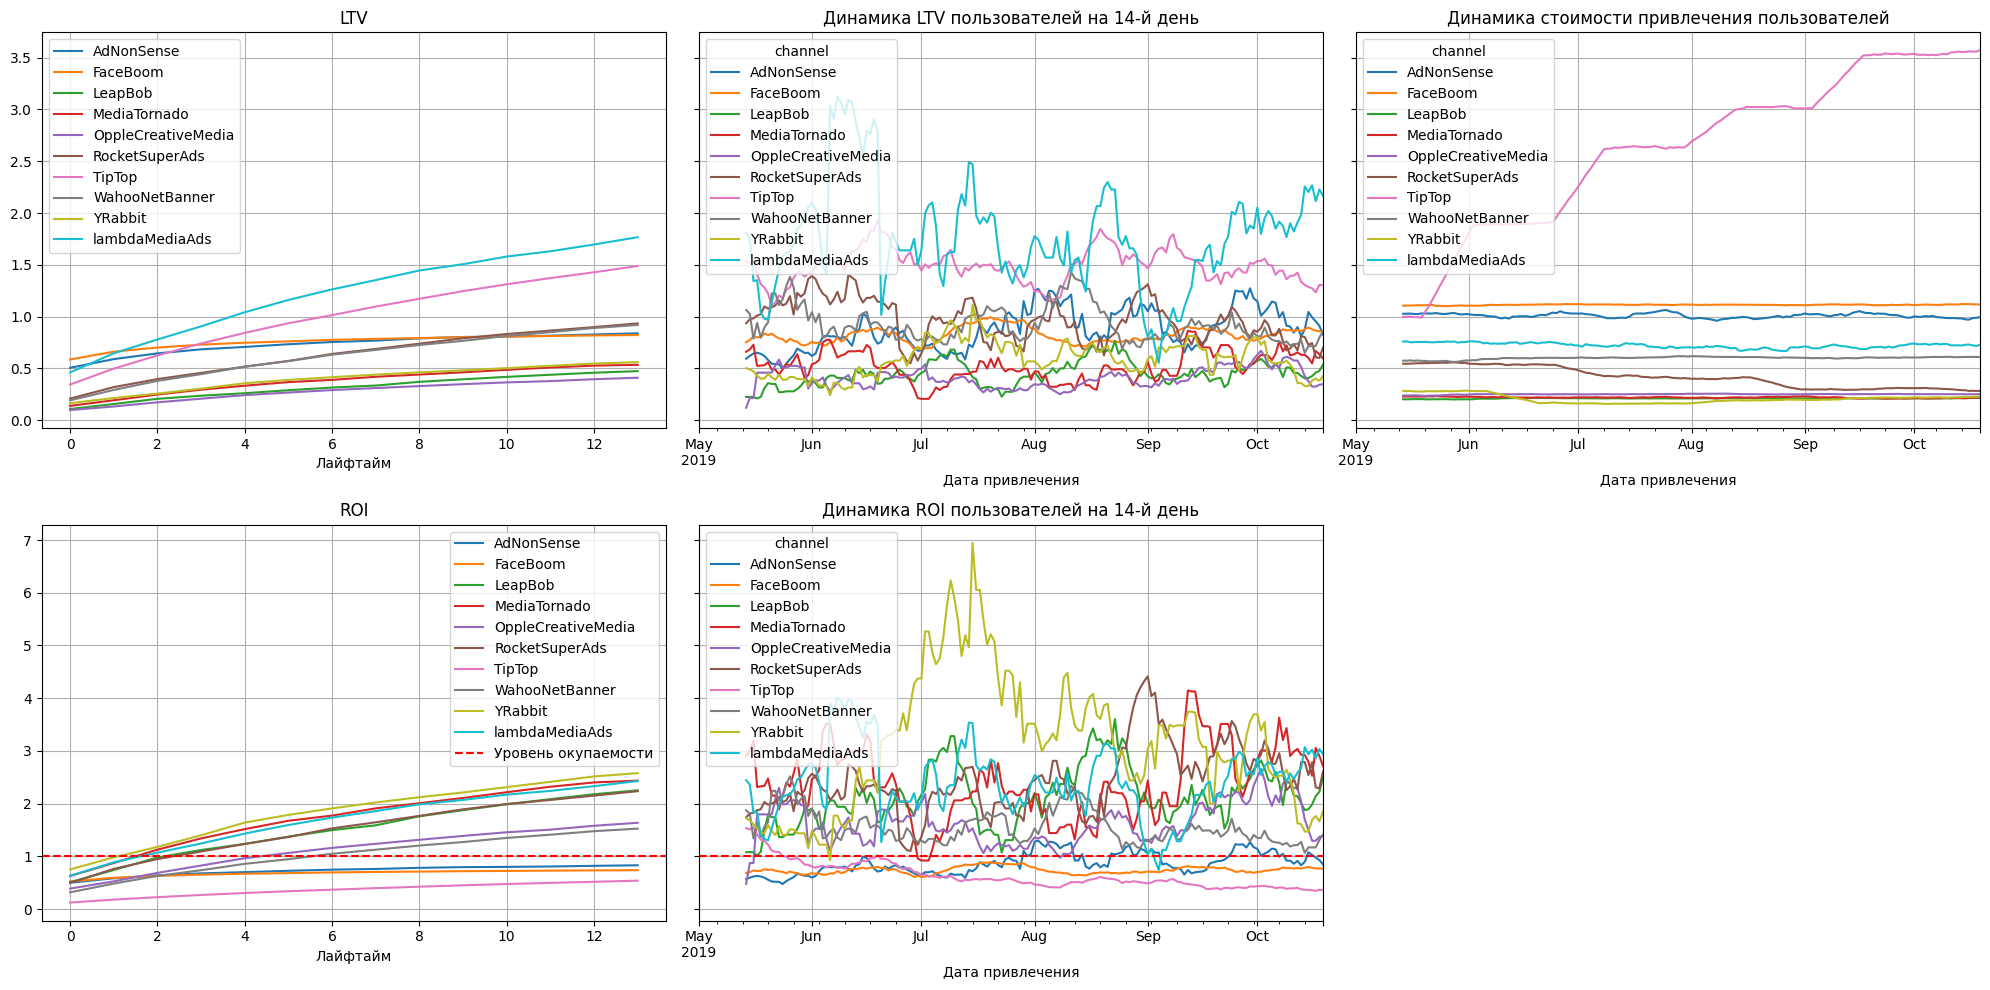

In [67]:
# окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** Из всех представленных каналов не окупаются только 3: FaceBoom, AdNonSense, TipTop. Из этих каналов приходят самые многочисленные доли платящих клиентов. Исследуем их отдельно на конверсию и удержание.

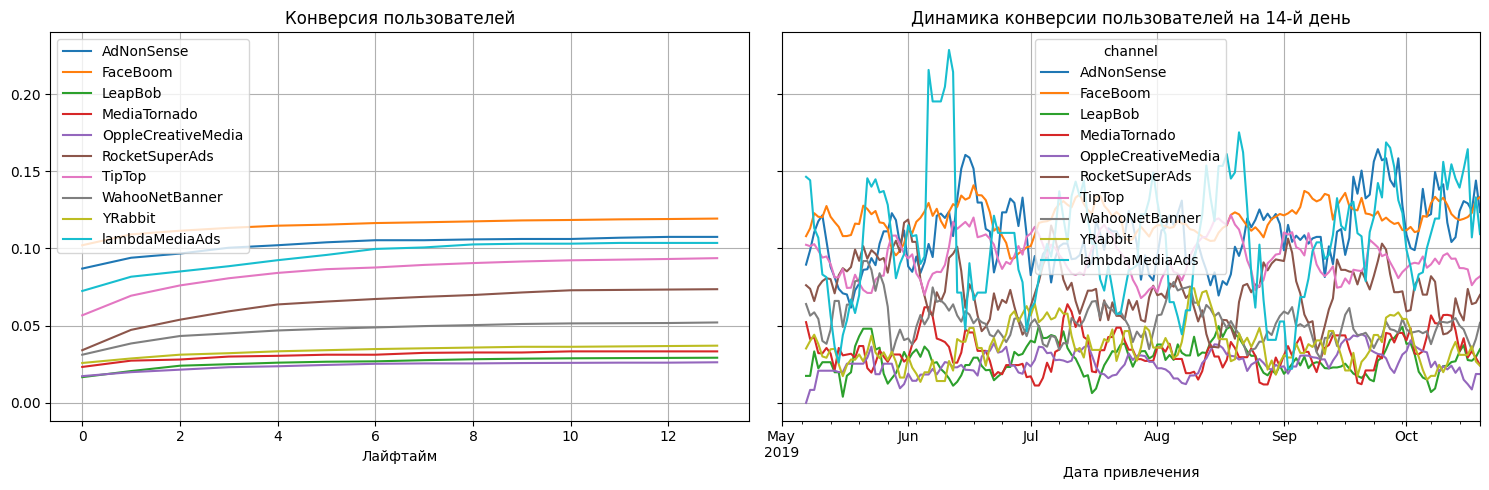

In [68]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

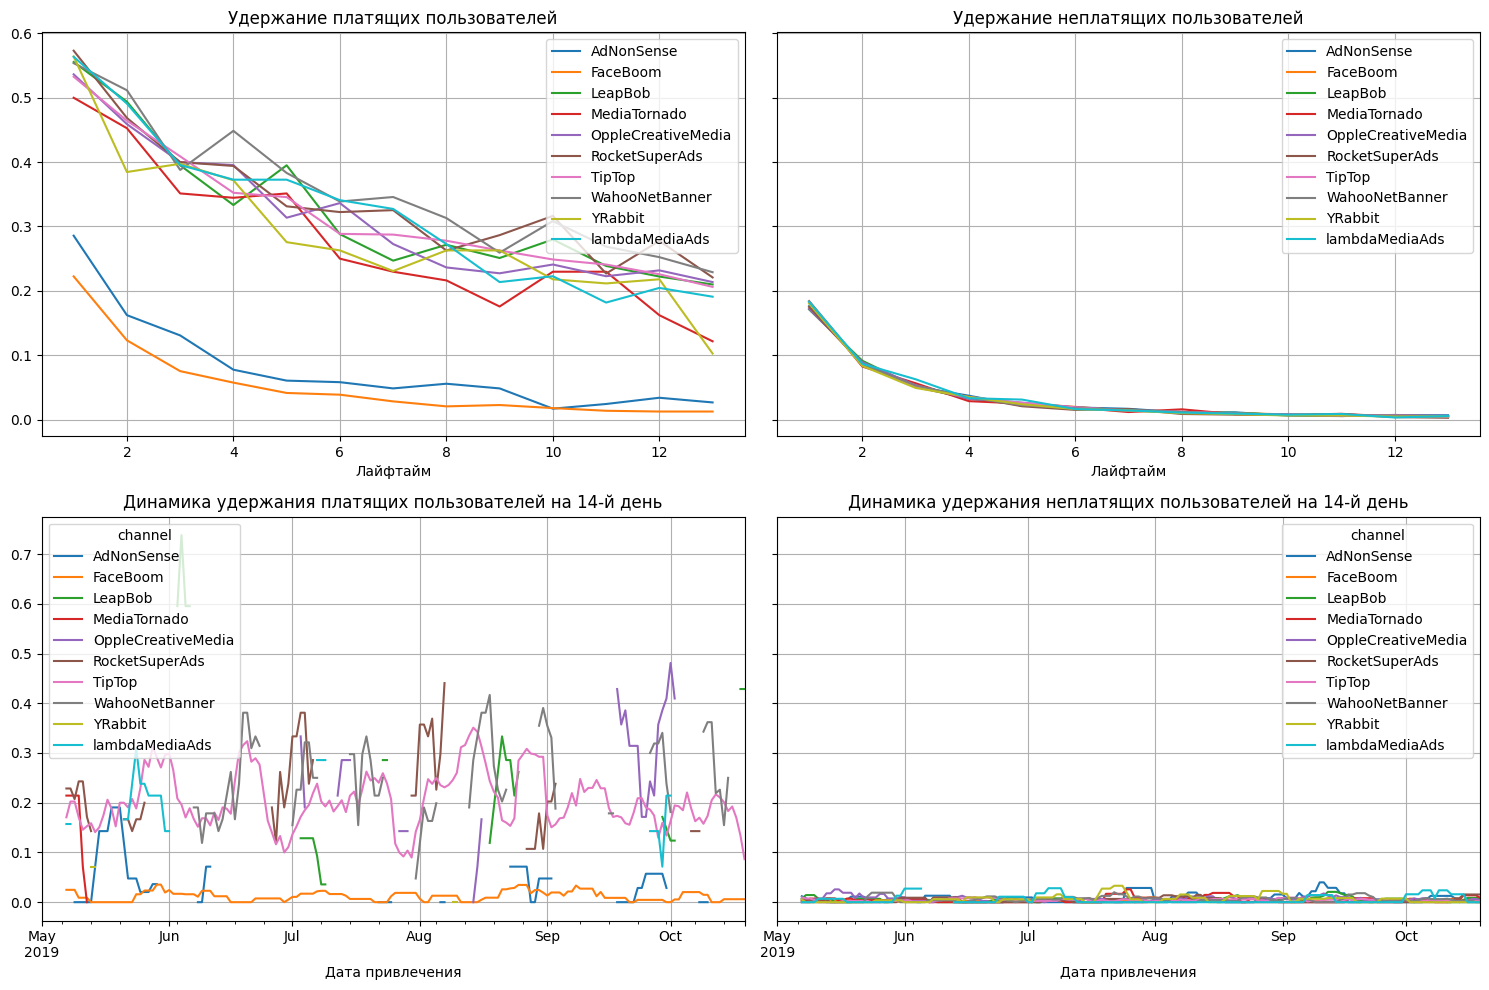

In [69]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков видно, что платящие клиенты стабильно плохо удерживаются из каналов FaceBoom и AdNonSense.

**Общий вывод:** В разделе окупаемость рекламы мы рассмотрели общую окупаемость, которая показала убыточность текущей схемы расходов на рекламу: доходы от затрат на нее составили 80%. Затем была рассмотрена окупаемость в разрезе по устройствам, странам и рекламным каналам, а так же по конверсии и удержанию. Выявлена общая закономерность - конверсия самых крупных когорт хорошая, а удержание плохое. И хорошее удержание более маленьких когорт при более худшей конверсии по сравнению с большими когортами.

#### Ответы на вопросы.

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

- В целом реклама окупается, но имеет тенденцию к снижению окупаемости.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

- Устройства на Iphone и Mac, платящие пользовталели из США и каналы FaceBoom и AdNonSense могут оказывать негативное влияние на окупаемость рекламы.

**Чем могут быть вызваны проблемы окупаемости?**

- Проблемы окупаемости вызваны низким уровнем удержания от самых многочисленных и самых доходных когорт пользователей компании.

### Общие выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Компании приходится все больше и больше вкладывать инвестиций в привлчение новых пользователей на занимаемых ей рынках, чтобы только держаться на плаву. Основную долю рынка составляют самые крупные когорты пользующиеся Iphone и Mac, пользователи из США, привлеченные из 2 каналов - FaceBoom и AdNonSense. 

1. Неэффективность привлечения пользователей заключается в сследующих причинах:
- Первая причина. У всех когорт наблюдается низкий уровень удержания, то есть они быстро "отскакивают", совершив покупки. Это может быть, например, из-за наличия технических сбоев. 
- Вторая причина. Неэффективное распределение бюджета: вложенные средства в эти когорты не окупаются, в то время как остальные когорты показывают лучшую окупаемость и при лучших показателях удержания.

2. Рекомендации для отдела маркетинга:

Скорее всего отдел маркетинга привлекают очень хорошие показатели конверсии самых крупных когорт, что объясняет очень большие инвестиции в них. Для улучшения экономических показателей компании рекомендуется перераспрелить бюджет на инвестирование в сторону повышения конверсии более меньших когорт, а крупным когортам повысить показатели удержания. Этого можно добиться путем проведения специальных акций. Также стоит провести отдельное расследование на наличие технических сбоев для Iphone и Mac.